# Train the agent to play Street Fighter with PPO Algorithm

## Setup StreetFighter environment

In [ ]:
!pip install gym

You should consider upgrading via the 'c:\users\marya\documents\courses\streetfighterrl\.venv\scripts\python.exe -m pip install --upgrade pip' command.



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827630 sha256=7732b76ac383bba10ebb2b7c7ad82a41e31d9eb4374dadf9ae5ec6d86b4a06ca
  Stored in directory: c:\users\marya\appdata\local\pip\cache\wheels\17\79\65\7afedc162d858b02708a3b8f7a6dd5b1000dcd5b0f894f7cc1
Successfully built gym


In [2]:
!pip install gym-retro

You should consider upgrading via the 'c:\users\marya\documents\courses\streetfighterrl\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
# Import retro to play Street Fighter using a ROM
import retro
# Import time to slow down game
import time
# Import environment base class for a wrapper 
from gym import Env 
# Import the space shapes for the environment
from gym.spaces import MultiBinary, Box
# Import numpy to calculate frame delta 
import numpy as np
# Import opencv for grayscaling
import cv2
# Import matplotlib for plotting the image
from matplotlib import pyplot as plt

Downloading The Rom Files

In [6]:
# Starts up the game environment
env = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')

ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


## Discovering the environment

In [3]:
# Sample the observation space
env.observation_space

Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
 

In [3]:
# Sample the actions that are avaialble - MultiBinary
env.action_space.sample()

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int8)

In [63]:
env = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')
obs = env.reset()


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


## test the game and see how the agent is working

In [19]:
# Reset game to starting state
obs = env.reset()
# Set flag to flase
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        time.sleep(0.01)
        print(reward)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [30]:
# Reset game to starting state
obs = env.reset()
# Set flag to flase
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        time.sleep(0.01)
        print(reward)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


KeyboardInterrupt: 

as we noticed while the agent is playing,he is does not know how to defent and how to play and he looss the game at began of the game . 

# Setup Environment
calling the custom environment from street-fighter-env:


In [3]:
from street_fighter_env import StreetFighter
env = StreetFighter()

ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


Installing and importing the necessary libraries   

In [ ]:
!pip install opencv-python

In [12]:
env.action_space.shape

(12,)

Run the Game  with custom environment to see the result.

In [53]:
# Reset game to starting state
obs = env.reset()
# Set flag to flase
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        #env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        time.sleep(0.01)
        if reward > 0: 
            print(reward)

500
1000
500
300
500


KeyboardInterrupt: 

After we watch the game running with custom environment, we saw a big improvement. and we had some good score as it show below.

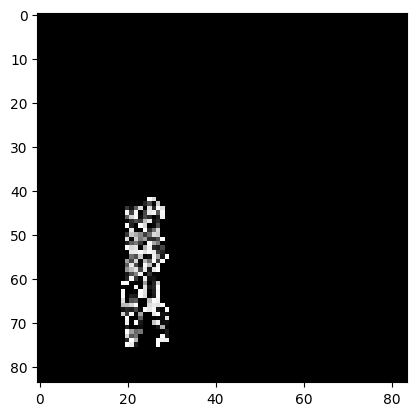

In [ ]:
# sample action space after the preprocessing 
obs = env.reset()
obs, reward, done, info = env.step(env.action_space.sample())
plt.imshow(cv2.cvtColor(obs, cv2.COLOR_BGR2RGB))

# Hyperparameter tune
Here we will use the Optuna for hypermeter tunning 

In [24]:
!pip install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio===0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html

You should consider upgrading via the 'c:\users\marya\documents\courses\streetfighterrl\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [9]:
!pip install stable-baselines3[extra] optuna

  Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.5.0
    Uninstalling typing-extensions-4.5.0:
      Successfully uninstalled typing-extensions-4.5.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.
You should consider upgrading via the 'c:\users\marya\documents\courses\streetfighterrl\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
# Importing the optimzation frame - HPO
import optuna
# PPO algo for RL
from stable_baselines3 import PPO
# Bring in the eval policy method for metric calculation
from stable_baselines3.common.evaluation import evaluate_policy
# Import the sb3 monitor for logging 
from stable_baselines3.common.monitor import Monitor
# Import the vec wrappers to vectorize and frame stack
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
# Import os to deal with filepaths
import os

c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
LOG_DIR = './logs2/'
OPT_DIR = './models/'

In [8]:
# Function to return test hyperparameters - define the object function
def optimize_ppo(trial): 
   return {
        'n_steps': trial.suggest_int('n_steps', 2048, 8192),
        'gamma': trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-4)
    }

In [41]:
SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(1))

In [10]:
# Run a training loop and return mean reward 
def optimize_agent(trial):
    try:
        model_params = optimize_ppo(trial) 

        # Create environment 
        env = StreetFighter()
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        env = VecFrameStack(env, 4, channels_order='last')

        # Create algo 
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        model.learn(total_timesteps=50000)
        #model.learn(total_timesteps=100000)

        # Evaluate model 
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        env.close()

        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)

        return mean_reward

    except Exception as e:
        return -1000

In [28]:
env.close()


In [ ]:
# Creating the experiment 
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=50, n_jobs=1)
#study.optimize(optimize_agent, n_trials=100, n_jobs=1)

[I 2024-11-28 00:36:14,356] A new study created in memory with name: no-name-ac4e9e48-f4c1-42d1-8a42-45375bfe293a
C:\Users\marya\AppData\Local\Temp\ipykernel_11312\407924472.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 0.8, 0.9999),
C:\Users\marya\AppData\Local\Temp\ipykernel_11312\407924472.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-4)


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3396`, after every 53 untruncated mini-batches, there will be a truncated mini-batch of size 4
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3396 and n_envs=1)
  warnings.warn(
[I 2024-11-28 01:00:04,981] Trial 0 finished with value: 2000.0 and parameters: {'n_steps': 3396, 'gamma': 0.9279484684128938, 'learning_rate': 7.783064247089279e-05}. Best is trial 0 with value: 2000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7939`, after every 124 untruncated mini-batches, there will be a truncated mini-batch of size 3
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7939 and n_envs=1)
  warnings.warn(
[I 2024-11-28 01:28:31,262] Trial 1 finished with value: 1400.0 and parameters: {'n_steps': 7939, 'gamma': 0.9068318486120147, 'learning_rate': 1.4965352720749401e-05}. Best is trial 0 with value: 2000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5677`, after every 88 untruncated mini-batches, there will be a truncated mini-batch of size 45
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5677 and n_envs=1)
  warnings.warn(
[I 2024-11-28 02:00:49,245] Trial 2 finished with value: 2000.0 and parameters: {'n_steps': 5677, 'gamma': 0.8840365977227855, 'learning_rate': 8.409060461353218e-05}. Best is trial 0 with value: 2000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6246`, after every 97 untruncated mini-batches, there will be a truncated mini-batch of size 38
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6246 and n_envs=1)
  warnings.warn(
[I 2024-11-28 02:27:00,036] Trial 3 finished with value: 2000.0 and parameters: {'n_steps': 6246, 'gamma': 0.9597392461067419, 'learning_rate': 1.2136337767879648e-05}. Best is trial 0 with value: 2000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5556`, after every 86 untruncated mini-batches, there will be a truncated mini-batch of size 52
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5556 and n_envs=1)
  warnings.warn(
[I 2024-11-28 02:48:53,992] Trial 4 finished with value: 1000.0 and parameters: {'n_steps': 5556, 'gamma': 0.9487996254547335, 'learning_rate': 4.263638436303915e-05}. Best is trial 0 with value: 2000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2566`, after every 40 untruncated mini-batches, there will be a truncated mini-batch of size 6
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2566 and n_envs=1)
  warnings.warn(
[I 2024-11-28 03:10:11,569] Trial 5 finished with value: 2800.0 and parameters: {'n_steps': 2566, 'gamma': 0.8060835472207776, 'learning_rate': 1.538635688548879e-05}. Best is trial 5 with value: 2800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4626`, after every 72 untruncated mini-batches, there will be a truncated mini-batch of size 18
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4626 and n_envs=1)
  warnings.warn(
[I 2024-11-28 03:31:46,126] Trial 6 finished with value: 3600.0 and parameters: {'n_steps': 4626, 'gamma': 0.9775229100745452, 'learning_rate': 3.234368548527503e-05}. Best is trial 6 with value: 3600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5138`, after every 80 untruncated mini-batches, there will be a truncated mini-batch of size 18
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5138 and n_envs=1)
  warnings.warn(
[I 2024-11-28 03:52:40,438] Trial 7 finished with value: 2000.0 and parameters: {'n_steps': 5138, 'gamma': 0.9396750934913413, 'learning_rate': 1.2179239745175694e-05}. Best is trial 6 with value: 3600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7363`, after every 115 untruncated mini-batches, there will be a truncated mini-batch of size 3
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7363 and n_envs=1)
  warnings.warn(
[I 2024-11-28 04:13:09,679] Trial 8 finished with value: 1100.0 and parameters: {'n_steps': 7363, 'gamma': 0.9320542727980361, 'learning_rate': 4.764267516914929e-05}. Best is trial 6 with value: 3600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6288`, after every 98 untruncated mini-batches, there will be a truncated mini-batch of size 16
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6288 and n_envs=1)
  warnings.warn(
[I 2024-11-28 04:34:01,381] Trial 9 finished with value: 3500.0 and parameters: {'n_steps': 6288, 'gamma': 0.9920754955606609, 'learning_rate': 2.62772672056347e-05}. Best is trial 6 with value: 3600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3888`, after every 60 untruncated mini-batches, there will be a truncated mini-batch of size 48
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3888 and n_envs=1)
  warnings.warn(
[I 2024-11-28 04:58:07,662] Trial 10 finished with value: 2000.0 and parameters: {'n_steps': 3888, 'gamma': 0.8716594285640149, 'learning_rate': 2.8237220788939795e-05}. Best is trial 6 with value: 3600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6700`, after every 104 untruncated mini-batches, there will be a truncated mini-batch of size 44
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6700 and n_envs=1)
  warnings.warn(
[I 2024-11-28 05:24:21,441] Trial 11 finished with value: 1000.0 and parameters: {'n_steps': 6700, 'gamma': 0.9998554443838343, 'learning_rate': 2.751142124053831e-05}. Best is trial 6 with value: 3600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4174`, after every 65 untruncated mini-batches, there will be a truncated mini-batch of size 14
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4174 and n_envs=1)
  warnings.warn(
[I 2024-11-28 05:49:08,226] Trial 12 finished with value: 1000.0 and parameters: {'n_steps': 4174, 'gamma': 0.9994981319527501, 'learning_rate': 2.201678993327547e-05}. Best is trial 6 with value: 3600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4563`, after every 71 untruncated mini-batches, there will be a truncated mini-batch of size 19
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4563 and n_envs=1)
  warnings.warn(
[I 2024-11-28 06:12:39,643] Trial 13 finished with value: 1600.0 and parameters: {'n_steps': 4563, 'gamma': 0.9759533369514047, 'learning_rate': 4.205772154796311e-05}. Best is trial 6 with value: 3600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6601`, after every 103 untruncated mini-batches, there will be a truncated mini-batch of size 9
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6601 and n_envs=1)
  warnings.warn(
[I 2024-11-28 06:38:55,920] Trial 14 finished with value: 12600.0 and parameters: {'n_steps': 6601, 'gamma': 0.850367331283676, 'learning_rate': 1.987238725932842e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6903`, after every 107 untruncated mini-batches, there will be a truncated mini-batch of size 55
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6903 and n_envs=1)
  warnings.warn(
[I 2024-11-28 07:03:41,883] Trial 15 finished with value: 3400.0 and parameters: {'n_steps': 6903, 'gamma': 0.848077620798329, 'learning_rate': 1.9984596517878482e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3158`, after every 49 untruncated mini-batches, there will be a truncated mini-batch of size 22
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3158 and n_envs=1)
  warnings.warn(
[I 2024-11-28 07:28:13,688] Trial 16 finished with value: 1500.0 and parameters: {'n_steps': 3158, 'gamma': 0.8359520927980505, 'learning_rate': 6.364029276010207e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 8180`, after every 127 untruncated mini-batches, there will be a truncated mini-batch of size 52
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=8180 and n_envs=1)
  warnings.warn(
[I 2024-11-28 07:54:31,712] Trial 17 finished with value: 2100.0 and parameters: {'n_steps': 8180, 'gamma': 0.8521093200466567, 'learning_rate': 3.564917048607079e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4862`, after every 75 untruncated mini-batches, there will be a truncated mini-batch of size 62
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4862 and n_envs=1)
  warnings.warn(
[I 2024-11-28 08:19:17,595] Trial 18 finished with value: 2000.0 and parameters: {'n_steps': 4862, 'gamma': 0.8082859816865477, 'learning_rate': 2.0337017682179585e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5661`, after every 88 untruncated mini-batches, there will be a truncated mini-batch of size 29
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5661 and n_envs=1)
  warnings.warn(
[I 2024-11-28 08:42:44,220] Trial 19 finished with value: 2000.0 and parameters: {'n_steps': 5661, 'gamma': 0.9063311470538602, 'learning_rate': 5.616667561163321e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2194`, after every 34 untruncated mini-batches, there will be a truncated mini-batch of size 18
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2194 and n_envs=1)
  warnings.warn(
[I 2024-11-28 09:06:09,500] Trial 20 finished with value: 200.0 and parameters: {'n_steps': 2194, 'gamma': 0.82598361958407, 'learning_rate': 3.307973924280545e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6285`, after every 98 untruncated mini-batches, there will be a truncated mini-batch of size 13
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6285 and n_envs=1)
  warnings.warn(
[I 2024-11-28 09:32:06,200] Trial 21 finished with value: 2800.0 and parameters: {'n_steps': 6285, 'gamma': 0.9726529141744887, 'learning_rate': 2.3736796987321124e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7307`, after every 114 untruncated mini-batches, there will be a truncated mini-batch of size 11
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7307 and n_envs=1)
  warnings.warn(
[I 2024-11-28 09:57:06,220] Trial 22 finished with value: 3400.0 and parameters: {'n_steps': 7307, 'gamma': 0.9801080454397916, 'learning_rate': 1.5778608116936585e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6234`, after every 97 untruncated mini-batches, there will be a truncated mini-batch of size 26
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6234 and n_envs=1)
  warnings.warn(
[I 2024-11-28 10:23:54,593] Trial 23 finished with value: 3500.0 and parameters: {'n_steps': 6234, 'gamma': 0.8752483798686955, 'learning_rate': 2.662716691487819e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5349`, after every 83 untruncated mini-batches, there will be a truncated mini-batch of size 37
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5349 and n_envs=1)
  warnings.warn(
[I 2024-11-28 10:48:41,040] Trial 24 finished with value: 3700.0 and parameters: {'n_steps': 5349, 'gamma': 0.9170263631765196, 'learning_rate': 1.8341821287729105e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5290`, after every 82 untruncated mini-batches, there will be a truncated mini-batch of size 42
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5290 and n_envs=1)
  warnings.warn(
[I 2024-11-28 11:10:14,571] Trial 25 finished with value: 900.0 and parameters: {'n_steps': 5290, 'gamma': 0.9172498462656334, 'learning_rate': 1.8511135045974616e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4166`, after every 65 untruncated mini-batches, there will be a truncated mini-batch of size 6
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4166 and n_envs=1)
  warnings.warn(
[I 2024-11-28 11:34:56,085] Trial 26 finished with value: 2200.0 and parameters: {'n_steps': 4166, 'gamma': 0.8595465625127147, 'learning_rate': 1.0048916168704841e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4705`, after every 73 untruncated mini-batches, there will be a truncated mini-batch of size 33
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4705 and n_envs=1)
  warnings.warn(
[I 2024-11-28 11:58:28,687] Trial 27 finished with value: 3600.0 and parameters: {'n_steps': 4705, 'gamma': 0.8977598556827061, 'learning_rate': 1.745910699552995e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5912`, after every 92 untruncated mini-batches, there will be a truncated mini-batch of size 24
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5912 and n_envs=1)
  warnings.warn(
[I 2024-11-28 12:21:30,064] Trial 28 finished with value: 1000.0 and parameters: {'n_steps': 5912, 'gamma': 0.9526170763459365, 'learning_rate': 3.749660581397243e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3439`, after every 53 untruncated mini-batches, there will be a truncated mini-batch of size 47
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3439 and n_envs=1)
  warnings.warn(
[I 2024-11-28 12:43:02,726] Trial 29 finished with value: 2000.0 and parameters: {'n_steps': 3439, 'gamma': 0.9269487433760507, 'learning_rate': 1.3535749555981746e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6757`, after every 105 untruncated mini-batches, there will be a truncated mini-batch of size 37
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6757 and n_envs=1)
  warnings.warn(
[I 2024-11-28 13:06:03,697] Trial 30 finished with value: 3000.0 and parameters: {'n_steps': 6757, 'gamma': 0.8261704152152518, 'learning_rate': 3.071632635263859e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4669`, after every 72 untruncated mini-batches, there will be a truncated mini-batch of size 61
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4669 and n_envs=1)
  warnings.warn(
[I 2024-11-28 13:30:47,302] Trial 31 finished with value: 2000.0 and parameters: {'n_steps': 4669, 'gamma': 0.8942686320049672, 'learning_rate': 1.7602790430958298e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4982`, after every 77 untruncated mini-batches, there will be a truncated mini-batch of size 54
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4982 and n_envs=1)
  warnings.warn(
[I 2024-11-28 13:59:56,628] Trial 32 finished with value: 5200.0 and parameters: {'n_steps': 4982, 'gamma': 0.9005795165273057, 'learning_rate': 2.3129168908718902e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5269`, after every 82 untruncated mini-batches, there will be a truncated mini-batch of size 21
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5269 and n_envs=1)
  warnings.warn(
[I 2024-11-28 14:24:52,573] Trial 33 finished with value: 2600.0 and parameters: {'n_steps': 5269, 'gamma': 0.8858562892727335, 'learning_rate': 2.2795841559515028e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4307`, after every 67 untruncated mini-batches, there will be a truncated mini-batch of size 19
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4307 and n_envs=1)
  warnings.warn(
[I 2024-11-28 14:50:28,427] Trial 34 finished with value: 3400.0 and parameters: {'n_steps': 4307, 'gamma': 0.9140204294153212, 'learning_rate': 2.4825556263186528e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3417`, after every 53 untruncated mini-batches, there will be a truncated mini-batch of size 25
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3417 and n_envs=1)
  warnings.warn(
[I 2024-11-28 15:17:07,686] Trial 35 finished with value: 2000.0 and parameters: {'n_steps': 3417, 'gamma': 0.8786919339792993, 'learning_rate': 3.0123044146895967e-05}. Best is trial 14 with value: 12600.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3837`, after every 59 untruncated mini-batches, there will be a truncated mini-batch of size 61
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3837 and n_envs=1)
  warnings.warn(
[I 2024-11-28 15:43:44,559] Trial 36 finished with value: 25100.0 and parameters: {'n_steps': 3837, 'gamma': 0.8610887027735019, 'learning_rate': 2.0101904574154855e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2910`, after every 45 untruncated mini-batches, there will be a truncated mini-batch of size 30
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2910 and n_envs=1)
  warnings.warn(
[I 2024-11-28 16:07:56,413] Trial 37 finished with value: 2800.0 and parameters: {'n_steps': 2910, 'gamma': 0.8638197608673123, 'learning_rate': 1.407200860560832e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3898`, after every 60 untruncated mini-batches, there will be a truncated mini-batch of size 58
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3898 and n_envs=1)
  warnings.warn(
[I 2024-11-28 16:33:28,516] Trial 38 finished with value: 8800.0 and parameters: {'n_steps': 3898, 'gamma': 0.8443134604749056, 'learning_rate': 1.6957264988438826e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3746`, after every 58 untruncated mini-batches, there will be a truncated mini-batch of size 34
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3746 and n_envs=1)
  warnings.warn(
[I 2024-11-28 16:57:53,093] Trial 39 finished with value: 3700.0 and parameters: {'n_steps': 3746, 'gamma': 0.8427029285980784, 'learning_rate': 1.1878935024239022e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3198`, after every 49 untruncated mini-batches, there will be a truncated mini-batch of size 62
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3198 and n_envs=1)
  warnings.warn(
[I 2024-11-28 17:22:36,233] Trial 40 finished with value: 5100.0 and parameters: {'n_steps': 3198, 'gamma': 0.8185761650839672, 'learning_rate': 9.812465434372619e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2728`, after every 42 untruncated mini-batches, there will be a truncated mini-batch of size 40
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2728 and n_envs=1)
  warnings.warn(
[I 2024-11-28 17:48:19,172] Trial 41 finished with value: 2000.0 and parameters: {'n_steps': 2728, 'gamma': 0.8169459662202067, 'learning_rate': 9.43556962244647e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3735`, after every 58 untruncated mini-batches, there will be a truncated mini-batch of size 23
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3735 and n_envs=1)
  warnings.warn(
[I 2024-11-28 18:13:05,048] Trial 42 finished with value: 18200.0 and parameters: {'n_steps': 3735, 'gamma': 0.8381242969858257, 'learning_rate': 7.25506454318884e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3813`, after every 59 untruncated mini-batches, there will be a truncated mini-batch of size 37
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3813 and n_envs=1)
  warnings.warn(
[I 2024-11-28 18:39:38,599] Trial 43 finished with value: 8900.0 and parameters: {'n_steps': 3813, 'gamma': 0.8345059942942217, 'learning_rate': 6.69643239342668e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3825`, after every 59 untruncated mini-batches, there will be a truncated mini-batch of size 49
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3825 and n_envs=1)
  warnings.warn(
[I 2024-11-28 19:06:57,335] Trial 44 finished with value: 100.0 and parameters: {'n_steps': 3825, 'gamma': 0.8362070310458929, 'learning_rate': 7.163564945865178e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3652`, after every 57 untruncated mini-batches, there will be a truncated mini-batch of size 4
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3652 and n_envs=1)
  warnings.warn(
[I 2024-11-28 19:30:39,541] Trial 45 finished with value: 2000.0 and parameters: {'n_steps': 3652, 'gamma': 0.8608765615331485, 'learning_rate': 7.400448228522031e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4050`, after every 63 untruncated mini-batches, there will be a truncated mini-batch of size 18
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4050 and n_envs=1)
  warnings.warn(
[I 2024-11-28 19:54:43,932] Trial 46 finished with value: 2500.0 and parameters: {'n_steps': 4050, 'gamma': 0.8354571740141574, 'learning_rate': 5.193656495707082e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4418`, after every 69 untruncated mini-batches, there will be a truncated mini-batch of size 2
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4418 and n_envs=1)
  warnings.warn(
[I 2024-11-28 20:29:14,138] Trial 47 finished with value: 2000.0 and parameters: {'n_steps': 4418, 'gamma': 0.8503985415693891, 'learning_rate': 6.113753883594138e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2399`, after every 37 untruncated mini-batches, there will be a truncated mini-batch of size 31
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2399 and n_envs=1)
  warnings.warn(
[I 2024-11-28 20:54:52,375] Trial 48 finished with value: 2800.0 and parameters: {'n_steps': 2399, 'gamma': 0.800677522054786, 'learning_rate': 8.182031033505863e-05}. Best is trial 36 with value: 25100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3636`, after every 56 untruncated mini-batches, there will be a truncated mini-batch of size 52
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3636 and n_envs=1)
  warnings.warn(
[I 2024-11-28 21:20:17,026] Trial 49 finished with value: 2000.0 and parameters: {'n_steps': 3636, 'gamma': 0.8305349866555792, 'learning_rate': 6.637534747536096e-05}. Best is trial 36 with value: 25100.0.


## Experiment 3
-Training again with more number of hypermeter :

 we added clip_range  and gae_lambda to the hypermeters to getting better result
    
-increase number of trail to 100


In [36]:
LOG_DIR = './logs3/'
OPT_DIR = './models3/'

In [37]:
env.close()

In [38]:
# Function to return test hyperparameters - define the object function
def optimize_ppo(trial): 
    return {
        'n_steps':trial.suggest_int('n_steps', 2048, 8192),
        'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        'clip_range':trial.suggest_uniform('clip_range', 0.1, 0.4),
        'gae_lambda':trial.suggest_uniform('gae_lambda', 0.8, 0.99)
    }



In [39]:
SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(1))

In [31]:
# Run a training loop and return mean reward 
def optimize_agent(trial):
    try:
        model_params = optimize_ppo(trial) 

        # Create environment 
        env = StreetFighter()
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        env = VecFrameStack(env, 4, channels_order='last')

        # Create algo 
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        model.learn(total_timesteps=50000)
        

        # Evaluate model 
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        env.close()

        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)

        return mean_reward

    except Exception as e:
        return -1000

In [ ]:
# Creating the experiment 
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=100, n_jobs=1)



[I 2024-12-06 21:58:09,687] A new study created in memory with name: no-name-37715fc3-d176-4d47-b3a9-037f57fdc64f
C:\Users\marya\AppData\Local\Temp\ipykernel_1556\2416195314.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
C:\Users\marya\AppData\Local\Temp\ipykernel_1556\2416195314.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
C:\Users\marya\AppData\Local\Temp\ipykernel_1556\2416195314.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases

ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4306`, after every 67 untruncated mini-batches, there will be a truncated mini-batch of size 18
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4306 and n_envs=1)
  warnings.warn(
[I 2024-12-06 22:31:11,468] Trial 0 finished with value: 4000.0 and parameters: {'n_steps': 4306, 'gamma': 0.8803519862998457, 'learning_rate': 2.1948229197284795e-05, 'clip_range': 0.2992473732394526, 'gae_lambda': 0.8946169557111016}. Best is trial 0 with value: 4000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7365`, after every 115 untruncated mini-batches, there will be a truncated mini-batch of size 5
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7365 and n_envs=1)
  warnings.warn(
[I 2024-12-06 23:00:58,692] Trial 1 finished with value: 2000.0 and parameters: {'n_steps': 7365, 'gamma': 0.9157880955416348, 'learning_rate': 8.383926823847757e-05, 'clip_range': 0.27587633335645334, 'gae_lambda': 0.90284617981183}. Best is trial 0 with value: 4000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4216`, after every 65 untruncated mini-batches, there will be a truncated mini-batch of size 56
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4216 and n_envs=1)
  warnings.warn(
[I 2024-12-06 23:30:09,451] Trial 2 finished with value: 1000.0 and parameters: {'n_steps': 4216, 'gamma': 0.8148947879370919, 'learning_rate': 1.4628412073791587e-05, 'clip_range': 0.3141451890191798, 'gae_lambda': 0.973353024873268}. Best is trial 0 with value: 4000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6598`, after every 103 untruncated mini-batches, there will be a truncated mini-batch of size 6
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6598 and n_envs=1)
  warnings.warn(
[I 2024-12-06 23:55:48,725] Trial 3 finished with value: 4800.0 and parameters: {'n_steps': 6598, 'gamma': 0.9681430487339713, 'learning_rate': 2.3365750296535046e-05, 'clip_range': 0.18491716307051398, 'gae_lambda': 0.9497434899617869}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5532`, after every 86 untruncated mini-batches, there will be a truncated mini-batch of size 28
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5532 and n_envs=1)
  warnings.warn(
[I 2024-12-07 00:20:20,569] Trial 4 finished with value: 0.0 and parameters: {'n_steps': 5532, 'gamma': 0.9655405850662967, 'learning_rate': 1.6339222327919533e-05, 'clip_range': 0.31625439332259103, 'gae_lambda': 0.8022172465215576}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4723`, after every 73 untruncated mini-batches, there will be a truncated mini-batch of size 51
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4723 and n_envs=1)
  warnings.warn(
[I 2024-12-07 00:45:04,816] Trial 5 finished with value: 2600.0 and parameters: {'n_steps': 4723, 'gamma': 0.8866452029592305, 'learning_rate': 9.966273414012218e-05, 'clip_range': 0.16761223695428654, 'gae_lambda': 0.9414464186612903}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3418`, after every 53 untruncated mini-batches, there will be a truncated mini-batch of size 26
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3418 and n_envs=1)
  warnings.warn(
[I 2024-12-07 01:09:24,162] Trial 6 finished with value: 2000.0 and parameters: {'n_steps': 3418, 'gamma': 0.8623004295296146, 'learning_rate': 2.7607062322335892e-05, 'clip_range': 0.24592755157623772, 'gae_lambda': 0.9488343946014713}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7484`, after every 116 untruncated mini-batches, there will be a truncated mini-batch of size 60
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7484 and n_envs=1)
  warnings.warn(
[I 2024-12-07 01:33:37,457] Trial 7 finished with value: 2000.0 and parameters: {'n_steps': 7484, 'gamma': 0.8130305200389334, 'learning_rate': 1.7496784487307427e-05, 'clip_range': 0.29558444466657596, 'gae_lambda': 0.9800204710264317}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6009`, after every 93 untruncated mini-batches, there will be a truncated mini-batch of size 57
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6009 and n_envs=1)
  warnings.warn(
[I 2024-12-07 01:57:35,931] Trial 8 finished with value: 1000.0 and parameters: {'n_steps': 6009, 'gamma': 0.8448060768482503, 'learning_rate': 4.013551105029717e-05, 'clip_range': 0.28916715882271277, 'gae_lambda': 0.8483924600549234}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4937`, after every 77 untruncated mini-batches, there will be a truncated mini-batch of size 9
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4937 and n_envs=1)
  warnings.warn(
[I 2024-12-07 02:21:01,955] Trial 9 finished with value: 2000.0 and parameters: {'n_steps': 4937, 'gamma': 0.9012594826872893, 'learning_rate': 5.9816508549876294e-05, 'clip_range': 0.178607917538474, 'gae_lambda': 0.9524856568827207}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2066`, after every 32 untruncated mini-batches, there will be a truncated mini-batch of size 18
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2066 and n_envs=1)
  warnings.warn(
[I 2024-12-07 02:45:20,270] Trial 10 finished with value: 0.0 and parameters: {'n_steps': 2066, 'gamma': 0.9853560628767025, 'learning_rate': 3.9516112676671174e-05, 'clip_range': 0.10689832551815973, 'gae_lambda': 0.9038653439864649}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6425`, after every 100 untruncated mini-batches, there will be a truncated mini-batch of size 25
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6425 and n_envs=1)
  warnings.warn(
[I 2024-12-07 03:07:53,148] Trial 11 finished with value: 2000.0 and parameters: {'n_steps': 6425, 'gamma': 0.9394675651404157, 'learning_rate': 1.0106922531222364e-05, 'clip_range': 0.21626315834123022, 'gae_lambda': 0.8716544656185785}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3592`, after every 56 untruncated mini-batches, there will be a truncated mini-batch of size 8
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3592 and n_envs=1)
  warnings.warn(
[I 2024-12-07 03:31:08,049] Trial 12 finished with value: 4800.0 and parameters: {'n_steps': 3592, 'gamma': 0.9409511047839746, 'learning_rate': 2.496487777205578e-05, 'clip_range': 0.3895050422476598, 'gae_lambda': 0.9182417306549076}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3030`, after every 47 untruncated mini-batches, there will be a truncated mini-batch of size 22
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3030 and n_envs=1)
  warnings.warn(
[I 2024-12-07 03:54:50,247] Trial 13 finished with value: 0.0 and parameters: {'n_steps': 3030, 'gamma': 0.943071086594974, 'learning_rate': 3.344868235180258e-05, 'clip_range': 0.38547437225309966, 'gae_lambda': 0.9207206563684842}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 8157`, after every 127 untruncated mini-batches, there will be a truncated mini-batch of size 29
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=8157 and n_envs=1)
  warnings.warn(
[I 2024-12-07 04:20:00,644] Trial 14 finished with value: 3800.0 and parameters: {'n_steps': 8157, 'gamma': 0.9883510593084792, 'learning_rate': 2.3784504203538866e-05, 'clip_range': 0.3901635250683548, 'gae_lambda': 0.9290653135535215}. Best is trial 3 with value: 4800.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6840`, after every 106 untruncated mini-batches, there will be a truncated mini-batch of size 56
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6840 and n_envs=1)
  warnings.warn(
[I 2024-12-07 04:43:56,276] Trial 15 finished with value: 18100.0 and parameters: {'n_steps': 6840, 'gamma': 0.937893490868374, 'learning_rate': 5.296383320241074e-05, 'clip_range': 0.11784491549621842, 'gae_lambda': 0.8533281006042449}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6692`, after every 104 untruncated mini-batches, there will be a truncated mini-batch of size 36
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6692 and n_envs=1)
  warnings.warn(
[I 2024-12-07 05:07:15,429] Trial 16 finished with value: 1000.0 and parameters: {'n_steps': 6692, 'gamma': 0.9615928402635943, 'learning_rate': 5.633648189685268e-05, 'clip_range': 0.10446737443282474, 'gae_lambda': 0.8418659981556814}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


[I 2024-12-07 05:31:14,214] Trial 17 finished with value: 2000.0 and parameters: {'n_steps': 6848, 'gamma': 0.9197799614110429, 'learning_rate': 5.447664571330373e-05, 'clip_range': 0.14786912910084818, 'gae_lambda': 0.8243930520793098}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5721`, after every 89 untruncated mini-batches, there will be a truncated mini-batch of size 25
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5721 and n_envs=1)
  warnings.warn(
[I 2024-12-07 05:52:42,036] Trial 18 finished with value: 1000.0 and parameters: {'n_steps': 5721, 'gamma': 0.9996203264753091, 'learning_rate': 4.487241675264971e-05, 'clip_range': 0.14296113532286345, 'gae_lambda': 0.8774013911692694}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7589`, after every 118 untruncated mini-batches, there will be a truncated mini-batch of size 37
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7589 and n_envs=1)
  warnings.warn(
[I 2024-12-07 06:14:31,799] Trial 19 finished with value: 2000.0 and parameters: {'n_steps': 7589, 'gamma': 0.9642571385478282, 'learning_rate': 7.670828583820435e-05, 'clip_range': 0.20006765909302415, 'gae_lambda': 0.8679940948610424}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 8176`, after every 127 untruncated mini-batches, there will be a truncated mini-batch of size 48
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=8176 and n_envs=1)
  warnings.warn(
[I 2024-12-07 06:38:25,048] Trial 20 finished with value: 0.0 and parameters: {'n_steps': 8176, 'gamma': 0.9226353577994023, 'learning_rate': 3.280111033767648e-05, 'clip_range': 0.12763550246450225, 'gae_lambda': 0.965714874739571}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3667`, after every 57 untruncated mini-batches, there will be a truncated mini-batch of size 19
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3667 and n_envs=1)
  warnings.warn(
[I 2024-12-07 06:59:51,412] Trial 21 finished with value: 2800.0 and parameters: {'n_steps': 3667, 'gamma': 0.9458606473167044, 'learning_rate': 2.1291866679913478e-05, 'clip_range': 0.22477743815299425, 'gae_lambda': 0.9326133194726388}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2326`, after every 36 untruncated mini-batches, there will be a truncated mini-batch of size 22
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2326 and n_envs=1)
  warnings.warn(
[I 2024-12-07 07:21:37,551] Trial 22 finished with value: 1000.0 and parameters: {'n_steps': 2326, 'gamma': 0.973653702712429, 'learning_rate': 2.7319323776475314e-05, 'clip_range': 0.35790772924289493, 'gae_lambda': 0.919513339172088}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5984`, after every 93 untruncated mini-batches, there will be a truncated mini-batch of size 32
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5984 and n_envs=1)
  warnings.warn(
[I 2024-12-07 07:47:03,713] Trial 23 finished with value: 200.0 and parameters: {'n_steps': 5984, 'gamma': 0.9356275447811719, 'learning_rate': 1.9649168991297326e-05, 'clip_range': 0.18214682217576317, 'gae_lambda': 0.8886211261079119}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5385`, after every 84 untruncated mini-batches, there will be a truncated mini-batch of size 9
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5385 and n_envs=1)
  warnings.warn(
[I 2024-12-07 08:09:54,615] Trial 24 finished with value: 2000.0 and parameters: {'n_steps': 5385, 'gamma': 0.9029884798049473, 'learning_rate': 1.298841342501948e-05, 'clip_range': 0.34873731515105155, 'gae_lambda': 0.854314198288411}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6309`, after every 98 untruncated mini-batches, there will be a truncated mini-batch of size 37
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6309 and n_envs=1)
  warnings.warn(
[I 2024-12-07 08:32:32,387] Trial 25 finished with value: 2700.0 and parameters: {'n_steps': 6309, 'gamma': 0.9482479823430175, 'learning_rate': 2.6902836673580462e-05, 'clip_range': 0.25969103190849585, 'gae_lambda': 0.9606931021948804}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7013`, after every 109 untruncated mini-batches, there will be a truncated mini-batch of size 37
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7013 and n_envs=1)
  warnings.warn(
[I 2024-12-07 08:57:28,831] Trial 26 finished with value: 2000.0 and parameters: {'n_steps': 7013, 'gamma': 0.9263707632560811, 'learning_rate': 4.596079365775003e-05, 'clip_range': 0.154532345253674, 'gae_lambda': 0.9882759812406646}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2973`, after every 46 untruncated mini-batches, there will be a truncated mini-batch of size 29
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2973 and n_envs=1)
  warnings.warn(
[I 2024-12-07 09:20:47,436] Trial 27 finished with value: 0.0 and parameters: {'n_steps': 2973, 'gamma': 0.9563777896448069, 'learning_rate': 3.576200518038305e-05, 'clip_range': 0.12600503100890662, 'gae_lambda': 0.91417403317708}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4295`, after every 67 untruncated mini-batches, there will be a truncated mini-batch of size 7
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4295 and n_envs=1)
  warnings.warn(
[I 2024-12-07 09:43:21,688] Trial 28 finished with value: 2300.0 and parameters: {'n_steps': 4295, 'gamma': 0.9785818962275009, 'learning_rate': 2.5929189539018983e-05, 'clip_range': 0.20268741777582566, 'gae_lambda': 0.8312097852340746}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4538`, after every 70 untruncated mini-batches, there will be a truncated mini-batch of size 58
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4538 and n_envs=1)
  warnings.warn(
[I 2024-12-07 10:07:16,188] Trial 29 finished with value: 3300.0 and parameters: {'n_steps': 4538, 'gamma': 0.8699465081118822, 'learning_rate': 6.836345674394825e-05, 'clip_range': 0.23234618544624525, 'gae_lambda': 0.8895333130488472}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3955`, after every 61 untruncated mini-batches, there will be a truncated mini-batch of size 51
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3955 and n_envs=1)
  warnings.warn(
[I 2024-12-07 10:29:16,689] Trial 30 finished with value: 2000.0 and parameters: {'n_steps': 3955, 'gamma': 0.9096807144388239, 'learning_rate': 1.9163456562726647e-05, 'clip_range': 0.3488994195361556, 'gae_lambda': 0.8013127474876524}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5016`, after every 78 untruncated mini-batches, there will be a truncated mini-batch of size 24
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5016 and n_envs=1)
  warnings.warn(
[I 2024-12-07 10:51:23,027] Trial 31 finished with value: 500.0 and parameters: {'n_steps': 5016, 'gamma': 0.8810039698030427, 'learning_rate': 2.219078739122146e-05, 'clip_range': 0.27200715525045843, 'gae_lambda': 0.9103955861457126}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3240`, after every 50 untruncated mini-batches, there will be a truncated mini-batch of size 40
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3240 and n_envs=1)
  warnings.warn(
[I 2024-12-07 11:13:39,953] Trial 32 finished with value: 2000.0 and parameters: {'n_steps': 3240, 'gamma': 0.8484795044588601, 'learning_rate': 1.3080276434982762e-05, 'clip_range': 0.31232672514385906, 'gae_lambda': 0.8938773010876591}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4020`, after every 62 untruncated mini-batches, there will be a truncated mini-batch of size 52
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4020 and n_envs=1)
  warnings.warn(
[I 2024-12-07 11:37:07,257] Trial 33 finished with value: 5000.0 and parameters: {'n_steps': 4020, 'gamma': 0.8271813745896621, 'learning_rate': 3.01657243269342e-05, 'clip_range': 0.3226516306355785, 'gae_lambda': 0.8613585065124721}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3952`, after every 61 untruncated mini-batches, there will be a truncated mini-batch of size 48
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3952 and n_envs=1)
  warnings.warn(
[I 2024-12-07 11:59:40,261] Trial 34 finished with value: 5200.0 and parameters: {'n_steps': 3952, 'gamma': 0.8054583534806867, 'learning_rate': 3.1476411496726696e-05, 'clip_range': 0.3695964843892283, 'gae_lambda': 0.8599443656636212}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4009`, after every 62 untruncated mini-batches, there will be a truncated mini-batch of size 41
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4009 and n_envs=1)
  warnings.warn(
[I 2024-12-07 12:22:16,654] Trial 35 finished with value: 1000.0 and parameters: {'n_steps': 4009, 'gamma': 0.8006109847444818, 'learning_rate': 3.124102868357224e-05, 'clip_range': 0.33104209500643167, 'gae_lambda': 0.859324366335615}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5356`, after every 83 untruncated mini-batches, there will be a truncated mini-batch of size 44
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5356 and n_envs=1)
  warnings.warn(
[I 2024-12-07 12:45:08,026] Trial 36 finished with value: 3400.0 and parameters: {'n_steps': 5356, 'gamma': 0.8287123005070495, 'learning_rate': 3.0222554244752645e-05, 'clip_range': 0.36119375521473307, 'gae_lambda': 0.8207164910493909}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7243`, after every 113 untruncated mini-batches, there will be a truncated mini-batch of size 11
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7243 and n_envs=1)
  warnings.warn(
[I 2024-12-07 13:07:15,844] Trial 37 finished with value: 4500.0 and parameters: {'n_steps': 7243, 'gamma': 0.8235343756908263, 'learning_rate': 4.659096350106606e-05, 'clip_range': 0.37210705738979705, 'gae_lambda': 0.8421623654754867}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4594`, after every 71 untruncated mini-batches, there will be a truncated mini-batch of size 50
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4594 and n_envs=1)
  warnings.warn(
[I 2024-12-07 13:29:18,753] Trial 38 finished with value: 2800.0 and parameters: {'n_steps': 4594, 'gamma': 0.8424093360423206, 'learning_rate': 3.847316664723158e-05, 'clip_range': 0.3328869146714412, 'gae_lambda': 0.8654264426986412}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7779`, after every 121 untruncated mini-batches, there will be a truncated mini-batch of size 35
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7779 and n_envs=1)
  warnings.warn(
[I 2024-12-07 13:53:17,807] Trial 39 finished with value: 1600.0 and parameters: {'n_steps': 7779, 'gamma': 0.8143567924474878, 'learning_rate': 1.6694074265054907e-05, 'clip_range': 0.24516613742436405, 'gae_lambda': 0.8818179037935318}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2672`, after every 41 untruncated mini-batches, there will be a truncated mini-batch of size 48
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2672 and n_envs=1)
  warnings.warn(
[I 2024-12-07 14:16:15,832] Trial 40 finished with value: 1000.0 and parameters: {'n_steps': 2672, 'gamma': 0.8006821636438307, 'learning_rate': 5.0025531829498256e-05, 'clip_range': 0.27749080377509305, 'gae_lambda': 0.8141150123000032}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3652`, after every 57 untruncated mini-batches, there will be a truncated mini-batch of size 4
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3652 and n_envs=1)
  warnings.warn(
[I 2024-12-07 14:38:41,778] Trial 41 finished with value: 300.0 and parameters: {'n_steps': 3652, 'gamma': 0.8319288447834433, 'learning_rate': 2.4068808381459832e-05, 'clip_range': 0.39455454761459907, 'gae_lambda': 0.8367524217382633}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3651`, after every 57 untruncated mini-batches, there will be a truncated mini-batch of size 3
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3651 and n_envs=1)
  warnings.warn(
[I 2024-12-07 15:00:52,814] Trial 42 finished with value: 3000.0 and parameters: {'n_steps': 3651, 'gamma': 0.9322098436199996, 'learning_rate': 2.9410032578121747e-05, 'clip_range': 0.377882082670428, 'gae_lambda': 0.935061806026223}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4061`, after every 63 untruncated mini-batches, there will be a truncated mini-batch of size 29
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4061 and n_envs=1)
  warnings.warn(
[I 2024-12-07 15:25:46,618] Trial 43 finished with value: 1000.0 and parameters: {'n_steps': 4061, 'gamma': 0.8947664166952938, 'learning_rate': 9.87446923237976e-05, 'clip_range': 0.399616895129188, 'gae_lambda': 0.8555920974339097}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4825`, after every 75 untruncated mini-batches, there will be a truncated mini-batch of size 25
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4825 and n_envs=1)
  warnings.warn(
[I 2024-12-07 15:50:06,284] Trial 44 finished with value: 3700.0 and parameters: {'n_steps': 4825, 'gamma': 0.8096134097361585, 'learning_rate': 3.539017876859649e-05, 'clip_range': 0.3682475281608677, 'gae_lambda': 0.9468735491258297}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3352`, after every 52 untruncated mini-batches, there will be a truncated mini-batch of size 24
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3352 and n_envs=1)
  warnings.warn(
[I 2024-12-07 16:13:23,753] Trial 45 finished with value: 300.0 and parameters: {'n_steps': 3352, 'gamma': 0.9507111752301841, 'learning_rate': 2.3940346413276365e-05, 'clip_range': 0.3241404017197287, 'gae_lambda': 0.8977163455731688}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6332`, after every 98 untruncated mini-batches, there will be a truncated mini-batch of size 60
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6332 and n_envs=1)
  warnings.warn(
[I 2024-12-07 16:35:16,247] Trial 46 finished with value: 800.0 and parameters: {'n_steps': 6332, 'gamma': 0.8694648377596871, 'learning_rate': 1.8973961216946004e-05, 'clip_range': 0.3050033274274981, 'gae_lambda': 0.8484394604138221}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4484`, after every 70 untruncated mini-batches, there will be a truncated mini-batch of size 4
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4484 and n_envs=1)
  warnings.warn(
[I 2024-12-07 16:58:02,631] Trial 47 finished with value: 1000.0 and parameters: {'n_steps': 4484, 'gamma': 0.9724517252305621, 'learning_rate': 4.083806379780571e-05, 'clip_range': 0.3449370374285622, 'gae_lambda': 0.8820316715867905}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5797`, after every 90 untruncated mini-batches, there will be a truncated mini-batch of size 37
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5797 and n_envs=1)
  warnings.warn(
[I 2024-12-07 17:21:07,634] Trial 48 finished with value: 3300.0 and parameters: {'n_steps': 5797, 'gamma': 0.9102797335557504, 'learning_rate': 2.9187222866701673e-05, 'clip_range': 0.17515024614493968, 'gae_lambda': 0.9039910606156145}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2819`, after every 44 untruncated mini-batches, there will be a truncated mini-batch of size 3
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2819 and n_envs=1)
  warnings.warn(
[I 2024-12-07 17:45:00,454] Trial 49 finished with value: 18000.0 and parameters: {'n_steps': 2819, 'gamma': 0.8591916176596557, 'learning_rate': 1.5057658416728572e-05, 'clip_range': 0.1919865679395069, 'gae_lambda': 0.8737180460235667}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2500`, after every 39 untruncated mini-batches, there will be a truncated mini-batch of size 4
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2500 and n_envs=1)
  warnings.warn(
[I 2024-12-07 18:07:45,877] Trial 50 finished with value: 1000.0 and parameters: {'n_steps': 2500, 'gamma': 0.8572573039094475, 'learning_rate': 1.4480924214365148e-05, 'clip_range': 0.19441217362616797, 'gae_lambda': 0.8714925529243115}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3817`, after every 59 untruncated mini-batches, there will be a truncated mini-batch of size 41
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3817 and n_envs=1)
  warnings.warn(
[I 2024-12-07 18:30:03,600] Trial 51 finished with value: 1000.0 and parameters: {'n_steps': 3817, 'gamma': 0.8212387137279145, 'learning_rate': 1.5276399812794905e-05, 'clip_range': 0.38209150795571845, 'gae_lambda': 0.8614296901120978}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2872`, after every 44 untruncated mini-batches, there will be a truncated mini-batch of size 56
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2872 and n_envs=1)
  warnings.warn(
[I 2024-12-07 18:52:41,555] Trial 52 finished with value: 2000.0 and parameters: {'n_steps': 2872, 'gamma': 0.8355159714901806, 'learning_rate': 2.5098322479289965e-05, 'clip_range': 0.16023073658491296, 'gae_lambda': 0.8766795925843243}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3199`, after every 49 untruncated mini-batches, there will be a truncated mini-batch of size 63
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3199 and n_envs=1)
  warnings.warn(
[I 2024-12-07 19:14:39,112] Trial 53 finished with value: 2000.0 and parameters: {'n_steps': 3199, 'gamma': 0.9927044174743446, 'learning_rate': 2.1447828621505524e-05, 'clip_range': 0.113260839730737, 'gae_lambda': 0.8490389425654175}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3472`, after every 54 untruncated mini-batches, there will be a truncated mini-batch of size 16
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3472 and n_envs=1)
  warnings.warn(
[I 2024-12-07 19:36:32,026] Trial 54 finished with value: 500.0 and parameters: {'n_steps': 3472, 'gamma': 0.8529899685279444, 'learning_rate': 1.1050468305136241e-05, 'clip_range': 0.14270853919746745, 'gae_lambda': 0.9543959286027306}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2739`, after every 42 untruncated mini-batches, there will be a truncated mini-batch of size 51
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2739 and n_envs=1)
  warnings.warn(
[I 2024-12-07 19:58:45,338] Trial 55 finished with value: 1500.0 and parameters: {'n_steps': 2739, 'gamma': 0.8078490162870966, 'learning_rate': 6.381989293559956e-05, 'clip_range': 0.21835732312138156, 'gae_lambda': 0.9409935883695781}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6490`, after every 101 untruncated mini-batches, there will be a truncated mini-batch of size 26
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6490 and n_envs=1)
  warnings.warn(
[I 2024-12-07 20:21:23,906] Trial 56 finished with value: 2300.0 and parameters: {'n_steps': 6490, 'gamma': 0.9572252785296888, 'learning_rate': 3.56712988324956e-05, 'clip_range': 0.13252106243449993, 'gae_lambda': 0.9689221286121656}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2272`, after every 35 untruncated mini-batches, there will be a truncated mini-batch of size 32
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2272 and n_envs=1)
  warnings.warn(
[I 2024-12-07 20:44:20,938] Trial 57 finished with value: 1200.0 and parameters: {'n_steps': 2272, 'gamma': 0.8217015418345666, 'learning_rate': 1.802785225754932e-05, 'clip_range': 0.1847586367104499, 'gae_lambda': 0.8735756748209008}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7074`, after every 110 untruncated mini-batches, there will be a truncated mini-batch of size 34
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7074 and n_envs=1)
  warnings.warn(
[I 2024-12-07 21:09:42,664] Trial 58 finished with value: 2100.0 and parameters: {'n_steps': 7074, 'gamma': 0.8370319185682003, 'learning_rate': 2.183718894383026e-05, 'clip_range': 0.28841882815301295, 'gae_lambda': 0.8642670398927486}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5206`, after every 81 untruncated mini-batches, there will be a truncated mini-batch of size 22
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5206 and n_envs=1)
  warnings.warn(
[I 2024-12-07 21:32:50,032] Trial 59 finished with value: 3500.0 and parameters: {'n_steps': 5206, 'gamma': 0.8668986756371496, 'learning_rate': 2.822219673413547e-05, 'clip_range': 0.1687581984149625, 'gae_lambda': 0.8377050091761927}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6708`, after every 104 untruncated mini-batches, there will be a truncated mini-batch of size 52
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6708 and n_envs=1)
  warnings.warn(
[I 2024-12-07 21:56:35,596] Trial 60 finished with value: 4200.0 and parameters: {'n_steps': 6708, 'gamma': 0.930923198658677, 'learning_rate': 4.231543658394555e-05, 'clip_range': 0.2412788985415612, 'gae_lambda': 0.8547187243116404}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7218`, after every 112 untruncated mini-batches, there will be a truncated mini-batch of size 50
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7218 and n_envs=1)
  warnings.warn(
[I 2024-12-07 22:19:15,780] Trial 61 finished with value: 3100.0 and parameters: {'n_steps': 7218, 'gamma': 0.8245285415779687, 'learning_rate': 5.280668580591034e-05, 'clip_range': 0.3773981179409244, 'gae_lambda': 0.8431427483229404}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6895`, after every 107 untruncated mini-batches, there will be a truncated mini-batch of size 47
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6895 and n_envs=1)
  warnings.warn(
[I 2024-12-07 22:43:24,762] Trial 62 finished with value: 4000.0 and parameters: {'n_steps': 6895, 'gamma': 0.8060376971602736, 'learning_rate': 4.819694686603846e-05, 'clip_range': 0.3606389130820284, 'gae_lambda': 0.8326892387042338}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7731`, after every 120 untruncated mini-batches, there will be a truncated mini-batch of size 51
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7731 and n_envs=1)
  warnings.warn(
[I 2024-12-07 23:07:44,368] Trial 63 finished with value: 5300.0 and parameters: {'n_steps': 7731, 'gamma': 0.8173567474921174, 'learning_rate': 3.361508850313375e-05, 'clip_range': 0.36825851489848416, 'gae_lambda': 0.8437042591544214}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7906`, after every 123 untruncated mini-batches, there will be a truncated mini-batch of size 34
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7906 and n_envs=1)
  warnings.warn(
[I 2024-12-07 23:30:51,805] Trial 64 finished with value: 4200.0 and parameters: {'n_steps': 7906, 'gamma': 0.8873861840635503, 'learning_rate': 3.139009892489899e-05, 'clip_range': 0.2565049708821033, 'gae_lambda': 0.8841976793615055}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4124`, after every 64 untruncated mini-batches, there will be a truncated mini-batch of size 28
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4124 and n_envs=1)
  warnings.warn(
[I 2024-12-07 23:55:35,071] Trial 65 finished with value: 2000.0 and parameters: {'n_steps': 4124, 'gamma': 0.8136357688363328, 'learning_rate': 2.5568486711634452e-05, 'clip_range': 0.3884418857380577, 'gae_lambda': 0.849606717006143}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7712`, after every 120 untruncated mini-batches, there will be a truncated mini-batch of size 32
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7712 and n_envs=1)
  warnings.warn(
[I 2024-12-08 00:23:12,224] Trial 66 finished with value: 2000.0 and parameters: {'n_steps': 7712, 'gamma': 0.9688473542301926, 'learning_rate': 7.523433531041491e-05, 'clip_range': 0.33876284492810693, 'gae_lambda': 0.9230059374499235}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6083`, after every 95 untruncated mini-batches, there will be a truncated mini-batch of size 3
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6083 and n_envs=1)
  warnings.warn(
[I 2024-12-08 00:50:43,414] Trial 67 finished with value: 2300.0 and parameters: {'n_steps': 6083, 'gamma': 0.9816585823166929, 'learning_rate': 3.396638909535691e-05, 'clip_range': 0.35385130323469793, 'gae_lambda': 0.9790531411333293}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7437`, after every 116 untruncated mini-batches, there will be a truncated mini-batch of size 13
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7437 and n_envs=1)
  warnings.warn(
[I 2024-12-08 01:16:56,082] Trial 68 finished with value: 2100.0 and parameters: {'n_steps': 7437, 'gamma': 0.9415748187405063, 'learning_rate': 3.722225023880408e-05, 'clip_range': 0.20737992053685628, 'gae_lambda': 0.8593059882572716}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4315`, after every 67 untruncated mini-batches, there will be a truncated mini-batch of size 27
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4315 and n_envs=1)
  warnings.warn(
[I 2024-12-08 01:40:18,999] Trial 69 finished with value: 1000.0 and parameters: {'n_steps': 4315, 'gamma': 0.8423247957639008, 'learning_rate': 4.316544429309932e-05, 'clip_range': 0.10087736108142699, 'gae_lambda': 0.8690731413535683}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7983`, after every 124 untruncated mini-batches, there will be a truncated mini-batch of size 47
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7983 and n_envs=1)
  warnings.warn(
[I 2024-12-08 02:05:22,954] Trial 70 finished with value: 2600.0 and parameters: {'n_steps': 7983, 'gamma': 0.8180466992030995, 'learning_rate': 2.2925240315170258e-05, 'clip_range': 0.36782254093152705, 'gae_lambda': 0.8266093810646202}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7276`, after every 113 untruncated mini-batches, there will be a truncated mini-batch of size 44
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7276 and n_envs=1)
  warnings.warn(
[I 2024-12-08 02:28:17,557] Trial 71 finished with value: 2600.0 and parameters: {'n_steps': 7276, 'gamma': 0.8301417378900251, 'learning_rate': 3.176387181670291e-05, 'clip_range': 0.37873336528861457, 'gae_lambda': 0.8434823059568997}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7657`, after every 119 untruncated mini-batches, there will be a truncated mini-batch of size 41
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7657 and n_envs=1)
  warnings.warn(
[I 2024-12-08 02:54:14,754] Trial 72 finished with value: 3000.0 and parameters: {'n_steps': 7657, 'gamma': 0.823735551475127, 'learning_rate': 6.039392957317995e-05, 'clip_range': 0.3673316294022856, 'gae_lambda': 0.8200307972498626}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6666`, after every 104 untruncated mini-batches, there will be a truncated mini-batch of size 10
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6666 and n_envs=1)
  warnings.warn(
[I 2024-12-08 03:21:19,657] Trial 73 finished with value: 2600.0 and parameters: {'n_steps': 6666, 'gamma': 0.8177319317052563, 'learning_rate': 1.9994451991948262e-05, 'clip_range': 0.399600528980086, 'gae_lambda': 0.8536998798152404}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7430`, after every 116 untruncated mini-batches, there will be a truncated mini-batch of size 6
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7430 and n_envs=1)
  warnings.warn(
[I 2024-12-08 03:46:19,188] Trial 74 finished with value: 6900.0 and parameters: {'n_steps': 7430, 'gamma': 0.805371364226402, 'learning_rate': 2.7103081678114336e-05, 'clip_range': 0.3209053734628332, 'gae_lambda': 0.8446252591295028}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7504`, after every 117 untruncated mini-batches, there will be a truncated mini-batch of size 16
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7504 and n_envs=1)
  warnings.warn(
[I 2024-12-08 04:12:08,294] Trial 75 finished with value: 0.0 and parameters: {'n_steps': 7504, 'gamma': 0.8005899129226072, 'learning_rate': 2.6447525837699958e-05, 'clip_range': 0.3241371217868578, 'gae_lambda': 0.8358005147087743}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3805`, after every 59 untruncated mini-batches, there will be a truncated mini-batch of size 29
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3805 and n_envs=1)
  warnings.warn(
[I 2024-12-08 04:36:00,225] Trial 76 finished with value: 2500.0 and parameters: {'n_steps': 3805, 'gamma': 0.8078311864763866, 'learning_rate': 2.787328937825224e-05, 'clip_range': 0.2951834172280463, 'gae_lambda': 0.808257247066673}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3097`, after every 48 untruncated mini-batches, there will be a truncated mini-batch of size 25
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3097 and n_envs=1)
  warnings.warn(
[I 2024-12-08 04:59:21,019] Trial 77 finished with value: 3000.0 and parameters: {'n_steps': 3097, 'gamma': 0.8040337438779386, 'learning_rate': 1.1519133786699453e-05, 'clip_range': 0.11516917342461126, 'gae_lambda': 0.8652956391942419}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3435`, after every 53 untruncated mini-batches, there will be a truncated mini-batch of size 43
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3435 and n_envs=1)
  warnings.warn(
[I 2024-12-08 05:22:32,224] Trial 78 finished with value: 1000.0 and parameters: {'n_steps': 3435, 'gamma': 0.8773721558769347, 'learning_rate': 2.0140726454204097e-05, 'clip_range': 0.31766906572896875, 'gae_lambda': 0.8783418629892477}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7038`, after every 109 untruncated mini-batches, there will be a truncated mini-batch of size 62
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7038 and n_envs=1)
  warnings.warn(
[I 2024-12-08 05:48:20,950] Trial 79 finished with value: 15000.0 and parameters: {'n_steps': 7038, 'gamma': 0.9580934988827513, 'learning_rate': 2.4825270032449692e-05, 'clip_range': 0.2730761991711045, 'gae_lambda': 0.8587244396677971}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6995`, after every 109 untruncated mini-batches, there will be a truncated mini-batch of size 19
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6995 and n_envs=1)
  warnings.warn(
[I 2024-12-08 06:13:52,781] Trial 80 finished with value: 1500.0 and parameters: {'n_steps': 6995, 'gamma': 0.8123276512194678, 'learning_rate': 3.330767112599394e-05, 'clip_range': 0.27396781411174576, 'gae_lambda': 0.8579605757266061}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7157`, after every 111 untruncated mini-batches, there will be a truncated mini-batch of size 53
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7157 and n_envs=1)
  warnings.warn(
[I 2024-12-08 06:36:42,603] Trial 81 finished with value: 2000.0 and parameters: {'n_steps': 7157, 'gamma': 0.952410393302419, 'learning_rate': 2.4867489543710627e-05, 'clip_range': 0.26327516920167604, 'gae_lambda': 0.8455049142289196}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7409`, after every 115 untruncated mini-batches, there will be a truncated mini-batch of size 49
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7409 and n_envs=1)
  warnings.warn(
[I 2024-12-08 06:59:29,847] Trial 82 finished with value: 16600.0 and parameters: {'n_steps': 7409, 'gamma': 0.9579520845644252, 'learning_rate': 2.9881005097620674e-05, 'clip_range': 0.3409044113122728, 'gae_lambda': 0.854144196512566}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7369`, after every 115 untruncated mini-batches, there will be a truncated mini-batch of size 9
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7369 and n_envs=1)
  warnings.warn(
[I 2024-12-08 07:20:47,538] Trial 83 finished with value: 2000.0 and parameters: {'n_steps': 7369, 'gamma': 0.9624916132893347, 'learning_rate': 2.8122485790615297e-05, 'clip_range': 0.34162342922636607, 'gae_lambda': 0.8523097383869479}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 8066`, after every 126 untruncated mini-batches, there will be a truncated mini-batch of size 2
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=8066 and n_envs=1)
  warnings.warn(
[I 2024-12-08 07:46:26,473] Trial 84 finished with value: 4000.0 and parameters: {'n_steps': 8066, 'gamma': 0.9759755341924675, 'learning_rate': 3.0190744726353608e-05, 'clip_range': 0.23315707792445917, 'gae_lambda': 0.8647682689517394}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7549`, after every 117 untruncated mini-batches, there will be a truncated mini-batch of size 61
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7549 and n_envs=1)
  warnings.warn(
[I 2024-12-08 08:10:09,375] Trial 85 finished with value: 1100.0 and parameters: {'n_steps': 7549, 'gamma': 0.9651470251068683, 'learning_rate': 2.3180162712428914e-05, 'clip_range': 0.30917026113523816, 'gae_lambda': 0.8608008398301981}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6805`, after every 106 untruncated mini-batches, there will be a truncated mini-batch of size 21
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6805 and n_envs=1)
  warnings.warn(
[I 2024-12-08 08:34:55,349] Trial 86 finished with value: 1500.0 and parameters: {'n_steps': 6805, 'gamma': 0.9685822940987654, 'learning_rate': 3.9091766311953125e-05, 'clip_range': 0.33022951846444837, 'gae_lambda': 0.8746481229472328}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6482`, after every 101 untruncated mini-batches, there will be a truncated mini-batch of size 18
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6482 and n_envs=1)
  warnings.warn(
[I 2024-12-08 08:57:38,487] Trial 87 finished with value: 2900.0 and parameters: {'n_steps': 6482, 'gamma': 0.9853806489683623, 'learning_rate': 3.413949640813821e-05, 'clip_range': 0.2865297516991153, 'gae_lambda': 0.8389278123415949}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6213`, after every 97 untruncated mini-batches, there will be a truncated mini-batch of size 5
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6213 and n_envs=1)
  warnings.warn(
[I 2024-12-08 09:23:15,326] Trial 88 finished with value: 4300.0 and parameters: {'n_steps': 6213, 'gamma': 0.9460886901993534, 'learning_rate': 2.9353843091421927e-05, 'clip_range': 0.302391993498575, 'gae_lambda': 0.8282048208736008}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7752`, after every 121 untruncated mini-batches, there will be a truncated mini-batch of size 8
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7752 and n_envs=1)
  warnings.warn(
[I 2024-12-08 09:48:07,636] Trial 89 finished with value: 2800.0 and parameters: {'n_steps': 7752, 'gamma': 0.9583928711753794, 'learning_rate': 3.722803521115874e-05, 'clip_range': 0.352848301383516, 'gae_lambda': 0.8501982474749308}. Best is trial 15 with value: 18100.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5688`, after every 88 untruncated mini-batches, there will be a truncated mini-batch of size 56
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5688 and n_envs=1)
  warnings.warn(
[I 2024-12-08 10:12:19,380] Trial 90 finished with value: 19000.0 and parameters: {'n_steps': 5688, 'gamma': 0.9524710768094705, 'learning_rate': 2.634102821031982e-05, 'clip_range': 0.31947212507101536, 'gae_lambda': 0.8882161176169282}. Best is trial 90 with value: 19000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6599`, after every 103 untruncated mini-batches, there will be a truncated mini-batch of size 7
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6599 and n_envs=1)
  warnings.warn(
[I 2024-12-08 10:37:10,553] Trial 91 finished with value: 3300.0 and parameters: {'n_steps': 6599, 'gamma': 0.9354171203117012, 'learning_rate': 2.7018738797768088e-05, 'clip_range': 0.3227295456429832, 'gae_lambda': 0.8905939902414534}. Best is trial 90 with value: 19000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5516`, after every 86 untruncated mini-batches, there will be a truncated mini-batch of size 12
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5516 and n_envs=1)
  warnings.warn(
[I 2024-12-08 11:02:09,676] Trial 92 finished with value: 500.0 and parameters: {'n_steps': 5516, 'gamma': 0.9535005575485005, 'learning_rate': 3.196917586976734e-05, 'clip_range': 0.3370603501452701, 'gae_lambda': 0.8703128184022307}. Best is trial 90 with value: 19000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5796`, after every 90 untruncated mini-batches, there will be a truncated mini-batch of size 36
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5796 and n_envs=1)
  warnings.warn(
[I 2024-12-08 11:26:04,399] Trial 93 finished with value: 1500.0 and parameters: {'n_steps': 5796, 'gamma': 0.9217002729748297, 'learning_rate': 2.0792256327453566e-05, 'clip_range': 0.31467374399912246, 'gae_lambda': 0.900776270136781}. Best is trial 90 with value: 19000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6913`, after every 108 untruncated mini-batches, there will be a truncated mini-batch of size 1
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6913 and n_envs=1)
  warnings.warn(
[I 2024-12-08 11:26:52,855] Trial 94 finished with value: -1000.0 and parameters: {'n_steps': 6913, 'gamma': 0.9948382910865377, 'learning_rate': 1.8181909305101695e-05, 'clip_range': 0.3476696669716169, 'gae_lambda': 0.8460319224170352}. Best is trial 90 with value: 19000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7325`, after every 114 untruncated mini-batches, there will be a truncated mini-batch of size 29
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7325 and n_envs=1)
  warnings.warn(
[I 2024-12-08 11:50:37,258] Trial 95 finished with value: 2000.0 and parameters: {'n_steps': 7325, 'gamma': 0.9476417790780841, 'learning_rate': 1.660357124607324e-05, 'clip_range': 0.1913352211071638, 'gae_lambda': 0.8847990903645313}. Best is trial 90 with value: 19000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7870`, after every 122 untruncated mini-batches, there will be a truncated mini-batch of size 62
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7870 and n_envs=1)
  warnings.warn(
[I 2024-12-08 12:17:37,289] Trial 96 finished with value: 3400.0 and parameters: {'n_steps': 7870, 'gamma': 0.9606556199073547, 'learning_rate': 2.3849351656270843e-05, 'clip_range': 0.2941228167573809, 'gae_lambda': 0.8567415741540924}. Best is trial 90 with value: 19000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


[I 2024-12-08 12:40:43,370] Trial 97 finished with value: 1700.0 and parameters: {'n_steps': 4723, 'gamma': 0.8183411294100424, 'learning_rate': 2.60576581198108e-05, 'clip_range': 0.15391138409094918, 'gae_lambda': 0.8683273966292291}. Best is trial 90 with value: 19000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7062`, after every 110 untruncated mini-batches, there will be a truncated mini-batch of size 22
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7062 and n_envs=1)
  warnings.warn(
[I 2024-12-08 13:07:23,659] Trial 98 finished with value: 4200.0 and parameters: {'n_steps': 7062, 'gamma': 0.8123477941460383, 'learning_rate': 2.231597288772622e-05, 'clip_range': 0.33187613970321084, 'gae_lambda': 0.8785175589210084}. Best is trial 90 with value: 19000.0.


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\stable_baselines3\ppo\ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5048`, after every 78 untruncated mini-batches, there will be a truncated mini-batch of size 56
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5048 and n_envs=1)
  warnings.warn(
[I 2024-12-08 13:32:05,425] Trial 99 finished with value: 5000.0 and parameters: {'n_steps': 5048, 'gamma': 0.804398090432981, 'learning_rate': 3.0252209464623504e-05, 'clip_range': 0.3616469606394091, 'gae_lambda': 0.8608710574770994}. Best is trial 90 with value: 19000.0.


In [41]:
study.best_params

{'n_steps': 5688,
 'gamma': 0.9524710768094705,
 'learning_rate': 2.634102821031982e-05,
 'clip_range': 0.31947212507101536,
 'gae_lambda': 0.8882161176169282}

In [42]:
study.best_trial

FrozenTrial(number=90, state=TrialState.COMPLETE, values=[19000.0], datetime_start=datetime.datetime(2024, 12, 8, 9, 48, 7, 638593), datetime_complete=datetime.datetime(2024, 12, 8, 10, 12, 19, 379130), params={'n_steps': 5688, 'gamma': 0.9524710768094705, 'learning_rate': 2.634102821031982e-05, 'clip_range': 0.31947212507101536, 'gae_lambda': 0.8882161176169282}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_steps': IntDistribution(high=8192, log=False, low=2048, step=1), 'gamma': FloatDistribution(high=0.9999, log=True, low=0.8, step=None), 'learning_rate': FloatDistribution(high=0.0001, log=True, low=1e-05, step=None), 'clip_range': FloatDistribution(high=0.4, log=False, low=0.1, step=None), 'gae_lambda': FloatDistribution(high=0.99, log=False, low=0.8, step=None)}, trial_id=90, value=None)

## The best trail was number 90, However it didn't work well on further training, we used trail number 49, with value: 18000.0.

In [ ]:
#loading the model 
model = PPO.load(os.path.join(OPT_DIR, 'trial_49_best_model.zip'))

In [ ]:
env.close()



# Setup Callback
saving the model while training on each 10000 steps

In [ ]:
# Import base callback 
from stable_baselines3.common.callbacks import BaseCallback

class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [ ]:
#Saving the models at Train folder
CHECKPOINT_DIR = './train/'
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# Train Model for more steps
now after we choose our best model with best parameters, we are going to train it with more steps (1 milion steps) 

In [199]:
# Create environment 
env = StreetFighter()
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')


ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


RuntimeError: Cannot create multiple emulator instances per process, make sure to call env.close() on each environment before creating a new one

In [ ]:
# Get the trial with number 49
trial_49 = study.trials[49]

# Access the parameters of trial 49
model_params = trial_49.params

# Print the parameters
print("Parameters for trial 49:", model_params)

model_params['n_steps'] = 2816  # set n_steps to 2816 to a factor of 64
model_params['learning_rate'] = 5e-7
model_params

Parameters for trial 49: {'n_steps': 2819, 'gamma': 0.8591916176596557, 'learning_rate': 1.5057658416728572e-05, 'clip_range': 0.1919865679395069, 'gae_lambda': 0.8737180460235667}


{'n_steps': 2816,
 'gamma': 0.8591916176596557,
 'learning_rate': 5e-07,
 'clip_range': 0.1919865679395069,
 'gae_lambda': 0.8737180460235667}

In [132]:
model.n_steps

2816

In [133]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Reload model's weights 
model.load(os.path.join(CHECKPOINT_DIR, 'trial_49_best_model.zip'))

In [ ]:
# start training 
model.learn(total_timesteps=1000000, callback=callback)
# model.learn(total_timestep=5000000) 

Logging to ./logs3/PPO_106
-----------------------------
| time/              |      |
|    fps             | 188  |
|    iterations      | 1    |
|    time_elapsed    | 14   |
|    total_timesteps | 2816 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 2            |
|    time_elapsed         | 94           |
|    total_timesteps      | 5632         |
| train/                  |              |
|    approx_kl            | 7.475472e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.192        |
|    entropy_loss         | -8.32        |
|    explained_variance   | -6.94e-05    |
|    learning_rate        | 5e-07        |
|    loss                 | 0.0201       |
|    n_updates            | 10           |
|    policy_gradient_loss | -8.97e-05    |
|    value_loss           | 1.22e+03     |
--------------------------------

## More Training

The training model went successfully and the rewards were increasing. now we will reload the pre trained model for 1000000 steps and train it more for 5 million steps .

In [203]:
model = PPO.load(os.path.join(CHECKPOINT_DIR, 'best_model_1000000.zip'))
# Extract the model parameters
model_params = {
    'n_steps': model.n_steps,
    'gamma': model.gamma,
    'learning_rate': model.learning_rate,
    'clip_range': model.clip_range,
    'gae_lambda':model.gae_lambda,
}

In [204]:
model_params

{'n_steps': 2816,
 'gamma': 0.8591916176596557,
 'learning_rate': 5e-07,
 'clip_range': <function stable_baselines3.common.utils.constant_fn.<locals>.func(_)>,
 'gae_lambda': 0.8737180460235667}

In [ ]:

model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Reload pre trained model's weights 
model.load(os.path.join(CHECKPOINT_DIR, 'best_model_1000000.zip'))

In [ ]:
env.close()
# Create environment 
env = StreetFighter()
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


In [207]:

# start training with the best model:  36
model.learn(total_timesteps=5000000, callback=callback)


Logging to ./logs3/PPO_108


-----------------------------
| time/              |      |
|    fps             | 190  |
|    iterations      | 1    |
|    time_elapsed    | 14   |
|    total_timesteps | 2816 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 65            |
|    iterations           | 2             |
|    time_elapsed         | 86            |
|    total_timesteps      | 5632          |
| train/                  |               |
|    approx_kl            | 5.8294444e-07 |
|    clip_fraction        | 0             |
|    clip_range           | 0.192         |
|    entropy_loss         | -8.32         |
|    explained_variance   | 2.86e-05      |
|    learning_rate        | 5e-07         |
|    loss                 | 4.98e+04      |
|    n_updates            | 10            |
|    policy_gradient_loss | -4.02e-05     |
|    value_loss           | 6.98e+05      |
------------------------------------------

# Test out the Model

In [12]:
from gym import Env
from gym.spaces import Discrete, Box, MultiBinary
import numpy as np
import cv2
model = PPO.load('./train/best_model_4190000')


In [6]:
env.close()
env = StreetFighter()
env = Monitor(env)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

ROM path: c:\Users\marya\Documents\Courses\RL-project-streetFighter\.venv\lib\site-packages\retro/data\stable\StreetFighterIISpecialChampionEdition-Genesis\rom.md


In [13]:
for episode in range(3): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        env.render()
        # time.sleep(0.01)
        total_reward += reward
    print('Total Reward is {} for episode {}'.format(total_reward, episode))
    time.sleep(2)

Total Reward is [48000.] for episode 0
Total Reward is [30500.] for episode 1
Total Reward is [60000.] for episode 2
